# Intro to Deep Learning

- Supervised Learning
- Logistic Regression
- Logistic Regression and Cost Function 
- Gradient Descent
- Derivatives
- Logistic Regression and Gradient Descent
- Vectorisation


In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

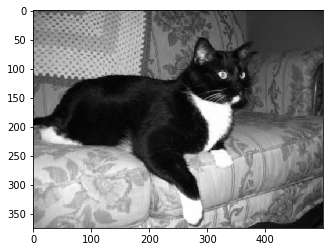

In [2]:

DATADIR = "PetImages"
CATEGORIES = ['Cats','Dogs']

for cat in CATEGORIES:
    path = os.path.join(DATADIR,cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        
        break
    break

In [3]:
img_array

array([[ 74,  73,  72, ...,  36,  36,  36],
       [ 69,  74,  82, ...,  38,  38,  38],
       [ 76,  86, 100, ...,  39,  39,  39],
       ...,
       [159, 159, 159, ...,  35,  33,  32],
       [153, 155, 156, ...,  35,  35,  36],
       [148, 151, 153, ...,  37,  39,  41]], dtype=uint8)

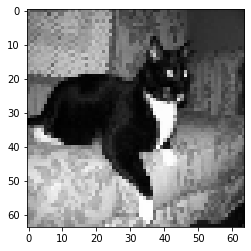

In [4]:
IMG_SIZE = 64

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
#load dataset
training_data = []

def creating_training_data():
    for cat in CATEGORIES:
        path = os.path.join(DATADIR,cat)
        CLASS_NUM = CATEGORIES.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, CLASS_NUM])
            except Exception as e:
                pass

creating_training_data()

In [6]:
print(len(training_data))

609


In [7]:
training_data[:2]

[[array([[117,  86,  89, ...,  46,  44,  40],
         [ 97, 129, 139, ...,  50,  47,  46],
         [137, 121, 143, ...,  52,  49,  48],
         ...,
         [127, 140, 181, ...,  10,  16,  10],
         [131, 162, 175, ...,  13,   8,   9],
         [158, 157, 165, ...,  14,   6,  36]], dtype=uint8), 0],
 [array([[245, 245, 246, ..., 190, 187, 180],
         [246, 246, 246, ..., 189, 186, 180],
         [245, 246, 246, ..., 189, 183, 179],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 0]]

In [8]:
# import random

# random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0


In [10]:
X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)
y = np.array(y).reshape(1,-1)

In [11]:
y.shape

(1, 609)

In [12]:
len(X)

609

In [13]:
X_train, X_test = X[:450], X[450:]; y_train, y_test = y[:,:450], y[:,450:]

In [14]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = y_train.shape[1]
m_test = y_test.shape[1]
num_px = X_train.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 1)")
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 450
Number of testing examples: m_test = 159
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 1)
train_set_x shape: (450, 64, 64, 1)
train_set_y shape: (1, 450)
test_set_x shape: (159, 64, 64, 1)
test_set_y shape: (1, 159)


In [15]:
y_train.shape[1]

450

In [16]:
# Reshape the training and test examples

train_set_x_flatten = X_train.reshape(X_train.shape[0], -1).T
test_set_x_flatten = X_test.reshape(X_test.shape[0], -1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (4096, 450)
train_set_y shape: (1, 450)
test_set_x_flatten shape: (4096, 159)
test_set_y shape: (1, 159)
sanity check after reshaping: [117  86  89  87  90]


In [17]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

# Building Algorithm

In [18]:
# GRADED FUNCTION: sigmoid

def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

In [19]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


In [20]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros(shape=(dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [21]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [22]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [23]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [24]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [25]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [26]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [27]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


# Merge all functions into a model

In [28]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [29]:
d = model(train_set_x, y_train, test_set_x, X_test, num_iterations = 6000, 
          learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.605146
Cost after iteration 200: 0.584884
Cost after iteration 300: 0.568453
Cost after iteration 400: 0.554193
Cost after iteration 500: 0.541395
Cost after iteration 600: 0.529676
Cost after iteration 700: 0.518804
Cost after iteration 800: 0.508627
Cost after iteration 900: 0.499039
Cost after iteration 1000: 0.489960
Cost after iteration 1100: 0.481331
Cost after iteration 1200: 0.473104
Cost after iteration 1300: 0.465238
Cost after iteration 1400: 0.457702
Cost after iteration 1500: 0.450468
Cost after iteration 1600: 0.443511
Cost after iteration 1700: 0.436810
Cost after iteration 1800: 0.430349
Cost after iteration 1900: 0.424110
Cost after iteration 2000: 0.418079
Cost after iteration 2100: 0.412243
Cost after iteration 2200: 0.406590
Cost after iteration 2300: 0.401111
Cost after iteration 2400: 0.395796
Cost after iteration 2500: 0.390635
Cost after iteration 2600: 0.385621
Cost after iteration 2700: 0.380746
Cost

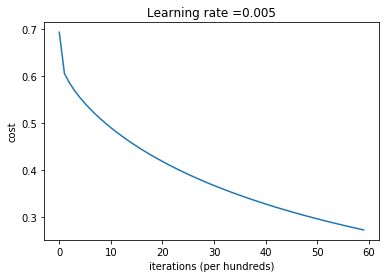

In [30]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 89.11111111111111 %
test accuracy: 19.49685534591194 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 69.33333333333334 %
test accuracy: 5.031446540880495 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 67.55555555555556 %
test accuracy: 0.0 %

-------------------------------------------------------



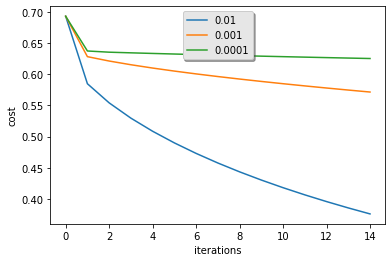

In [31]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, y_train, test_set_x, y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()